In [1]:
#Installing Libraries
import pandas as pd


In [2]:
Trans = pd.read_csv('Retail_Data_Transactions.csv')
Trans

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
Trans.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
Trans.tail()

,customer_id,trans_date,tran_amount
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13
124999,CS7996,13-Dec-14,36


In [11]:
Trans.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [12]:
Trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [3]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [4]:
df = pd.merge(Trans, response, on = 'customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [48]:
#Feature
df.shape

(124969, 5)

In [49]:
df.head()

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11


In [50]:
df.tail()

,customer_id,trans_date,tran_amount,response,month
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12
124999,CS7996,2014-12-13,36,0,12


In [51]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
month                   int64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124969 entries, 0 to 124999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124969 non-null  object        
 1   trans_date   124969 non-null  datetime64[ns]
 2   tran_amount  124969 non-null  int64         
 3   response     124969 non-null  int64         
 4   month        124969 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [53]:
df.describe()

,tran_amount,response,month
count,124969.000000,124969.000000,124969.000000
mean,64.995143,0.110763,6.631725
std,22.860059,0.313840,3.475188
min,10.000000,0.000000,1.000000
25%,47.000000,0.000000,4.000000
50%,65.000000,0.000000,7.000000
75%,83.000000,0.000000,10.000000
max,105.000000,1.000000,12.000000


In [12]:
#Missing Values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [13]:
(31/125000) * 100

0.024800000000000003

In [14]:
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [16]:
#Change DataTypes
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response'] = df['response'].astype('int64')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22572\3585468186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22572\3585468186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df['response'].astype('int64')


In [17]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
set(df['response'])

In [18]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [39]:
#Drop Columns

df = df.drop('Trans_data', axis = 1)


df = df.drop('trans_data', axis = 1)

In [5]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [41]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [41]:
#Check Outliers
#Z_Score
from scipy import stats
import numpy as np

#Calculate Z_Score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#Use of Abs makes the threshold value always greater than 3

#set a threshold
threshold = 3

#Outlier
Outliers = z_scores>threshold

print(Outliers)

0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 124969, dtype: bool


In [47]:
#Check Outliers
#Z_Score
from scipy import stats
import numpy as np

#Calculate Z_Score
z_scores = np.abs(stats.zscore(df['response']))

#Use of Abs makes the threshold value always greater than 3

#set a threshold
threshold = 3

#Outlier
Outliers = z_scores>threshold

print(Outliers)

0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 124969, dtype: bool


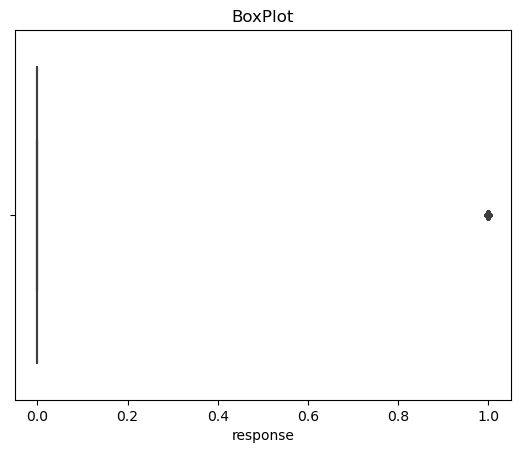

In [42]:
#BoxPlot
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x = df['response'])
plt.title('BoxPlot')
plt.show()


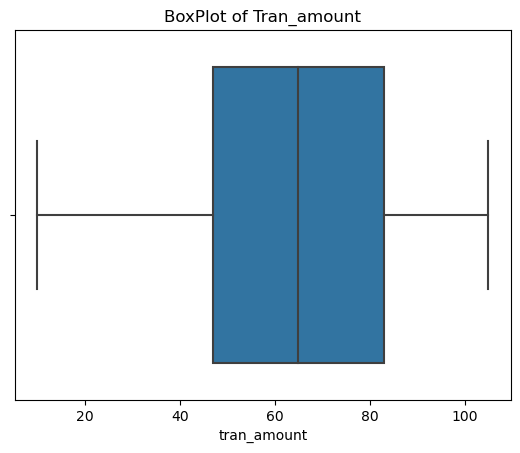

In [19]:
#BoxPlot
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x = df['tran_amount'])
plt.title('BoxPlot of Tran_amount')
plt.show()

In [20]:
#Creating New Columns
#It gives the number of month
df['month']=df['trans_date'].dt.month

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22572\1824379682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


In [21]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [22]:
#Which 3 months have had the highest tran_amount
monthly_Sales = df.groupby('month')['tran_amount'].sum()
monthly_Sales = monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [55]:
#Group by Customer id and 
# find out which 5 customers have had the highest number of orders

customer_counts = df['customer_id'].value_counts().reset_index()     #value_counts function give you count of things
customer_counts.columns=['customer_id','count']            #Rename the Columns
customer_counts 




,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [56]:
#Customers having the highest number of order

top_5_cus = customer_counts.sort_values(by ='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


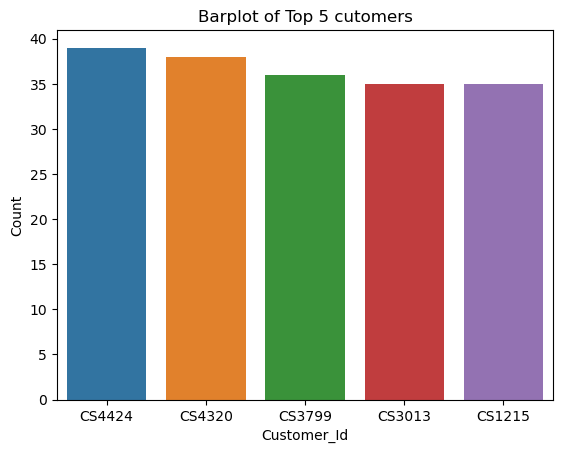

In [59]:
#BarPlot of Top 5 Customers
sns.barplot(x='customer_id', y='count', data=top_5_cus)
plt.xlabel('Customer_Id')
plt.ylabel('Count')
plt.title('Barplot of Top 5 cutomers')
plt.show()

In [60]:
#Group by Customer id and 
# find out which 5 customers have had the highest value of orders
customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()     

customer_sales          

#Top 5 Customers having the highest value of order
top_5_sales = customer_sales.sort_values(by ='tran_amount', ascending=False).head(5)
top_5_sales


,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


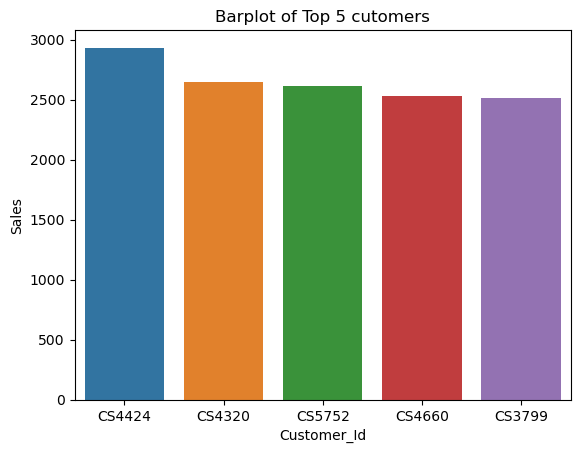

In [63]:
#BarPlot of Top 5 Customers
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales)
plt.xlabel('Customer_Id')
plt.ylabel('Sales')
plt.title('Barplot of Top 5 cutomers')
plt.show()

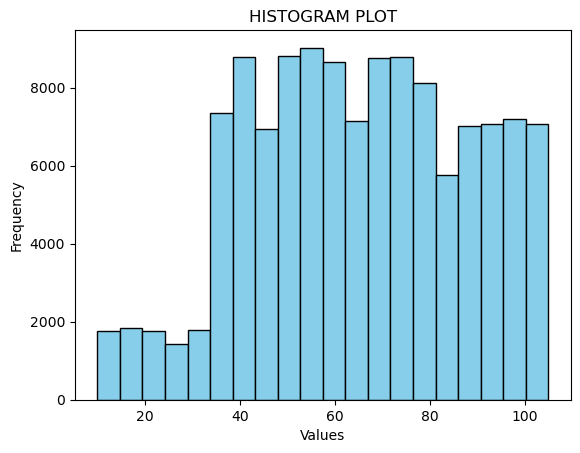

In [13]:
#Visualization
plt.hist(df['tran_amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('HISTOGRAM PLOT')
plt.show()

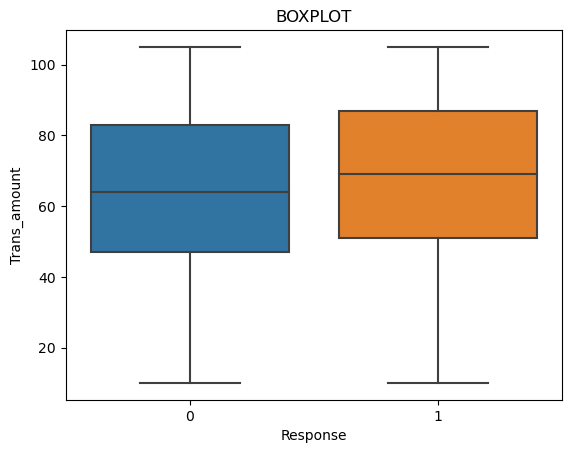

In [43]:
import seaborn as sns

sns.boxplot(x='response', y='tran_amount', data=df)
plt.xlabel('Response')
plt.ylabel('Trans_amount')
plt.title('BOXPLOT')
plt.show()

# Advanced Analytics

# Time Series Analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23948\2237945691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


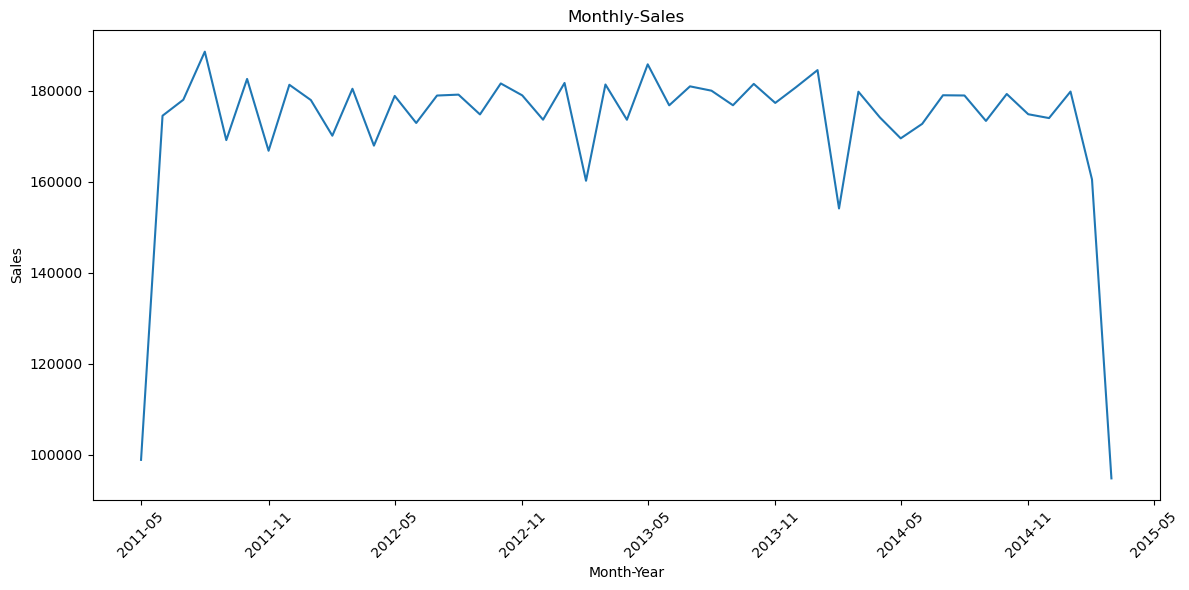

In [67]:
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_Sales = df.groupby('month_year')['tran_amount'].sum()


monthly_Sales.index = monthly_Sales.index.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(monthly_Sales.index, monthly_Sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly-Sales')
plt.xticks(rotation=45)                     #Helps to rotate the data label of axis 
plt.tight_layout()
plt.show()

In [63]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


# Cohort Segmentation ---Depending on Customer Behaviour

In [23]:
#Recency
#recency gives you what is the most recent order of a particular person
recency = df.groupby('customer_id')['trans_date'].max()

#Frequency
#Frequency gives you how many orders did the customer placed 
frequency = df.groupby('customer_id')['trans_date'].count()

#Monetary
monetary = df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm = pd.DataFrame({'recency': recency,
                    'frequency': frequency,
                     'monetary': monetary})

In [69]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [24]:
#Customer Segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
    
rfm['segment'] = rfm.apply(segment_customer, axis = 1)
    

    
#P0 is the highest cohort of customer segment    

In [25]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# Churn Analysis 

<AxesSubplot:>

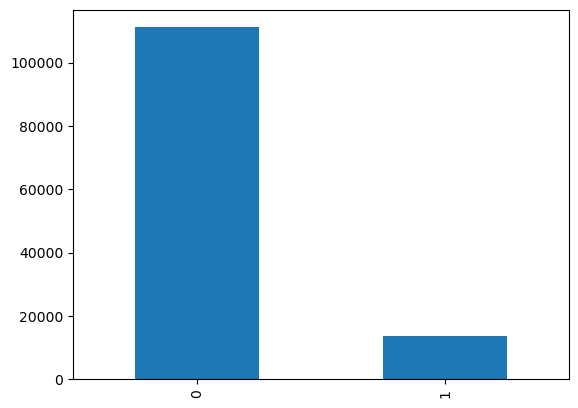

In [74]:
#Churn Analysis
# to know how well is your business performs and 
# how are the reviews and ratings of your customer

#--------0=Not Satisfies and 1=Satisfied
#-------peole who are not not satisfied are the potential churner
#If they are not satisfied by flipkart and 
# they move on to amazon they are known as Churned Customer


#Count the number of churned and active customers
churn_counts= df['response'].value_counts()

#PLots
churn_counts.plot(kind='bar')

# Analyzing top Customers

<AxesSubplot:xlabel='month_year'>

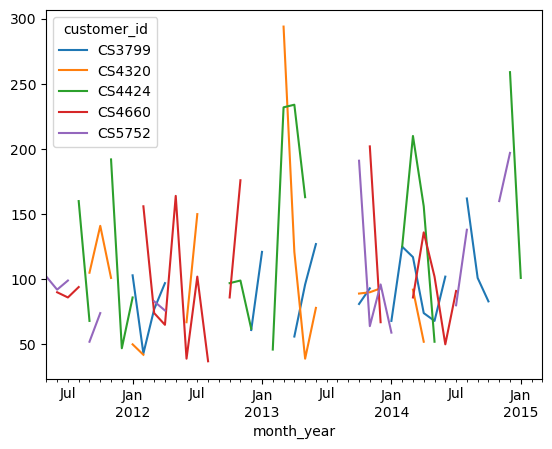

In [88]:
top_5_cus = monetary.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_5_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_5_sales.plot(kind='line')

In [89]:
#Exporting the Main Data as CSV file
df.to_csv('MainData.csv')

In [54]:
#Exporting the Rfm data as CSV file
rfm.to_csv('AddAnalysis.csv')

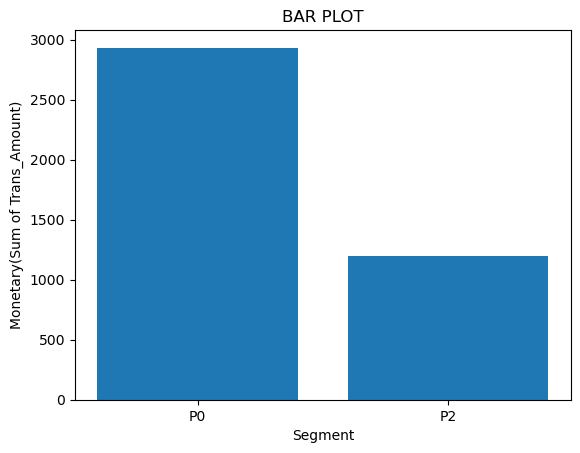

In [56]:
#Create a ScatterPlot
plt.bar(rfm['segment'], rfm['monetary'])
plt.xlabel('Segment')
plt.ylabel('Monetary(Sum of Trans_Amount)')
plt.title('BAR PLOT')
plt.show()

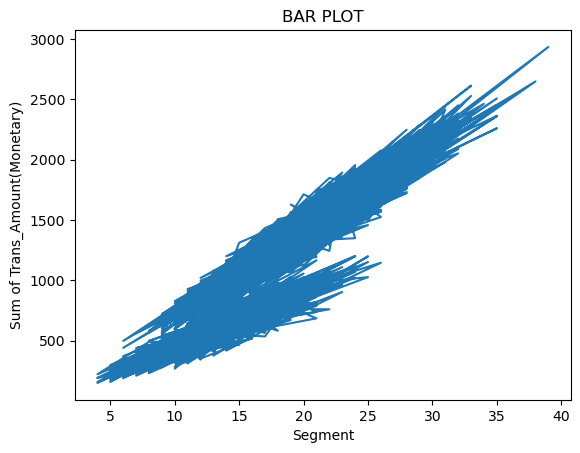

In [55]:
#Create a ScatterPlot
plt.plot(rfm['frequency'], rfm['monetary'])
plt.xlabel('Segment')
plt.ylabel('Sum of Trans_Amount(Monetary)')
plt.title('BAR PLOT')
plt.show()